In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.integrate import odeint
import scipy

In [9]:
def toggle_switch(yz, t, beta_y, beta_z, n_x, n_y, Km1, Km2, delta):
    """
    Right hand side for cascade X -> Y -> Z.  Return dy/dt and dz/dt.
    """
    # Unpack y and z
    y, z = yz

    # Compute dy/dt
    dy_dt = beta_y/ (1 + (z/Km1)**n_x) - delta*y
    
    # Compute dz/dt
    dz_dt = beta_z/ (1 + (y/Km2)**n_y) - delta*z
    
    
    # Return the result as a NumPy array
    return np.array([dy_dt, dz_dt])

In [10]:
def general_toggle_switch(yz, t, *args):
    """
    Right hand side for cascade X -> Y -> Z.  Return dy/dt and dz/dt.
    """
    #args = (np.array(args).reshape(2, 6))
    args1 = np.array([args[0], args[1], args[2], args[3]])
    args2 = np.array([args[4], args[5], args[6], args[7]])#, args[5], args[12], args[13]])
    
    # Unpack y and z
    y, z = yz
    
    # Compute dy/dt
    dy_dt = generalized_hill_function(z, args1) - args1[3]*y
    
    # Compute dz/dt
    dz_dt = generalized_hill_function(y, args2) - args2[3]*z
    
    # Return the result as a NumPy array
    return np.array([dy_dt, dz_dt])

In [11]:
def generalized_hill_function(y, args):
    b    = args[0]
    n    = args[1]
    beta  = args[2]
    return beta/(1 + b*y**n)

In [12]:
def residuals(p):
    p = tuple(p)
    for i in range(0, len(iv)):    
        # Integrate ODES
        #yz_og = scipy.integrate.odeint(toggle_switch, iv[i], t, args=args).T

        #y_og, z_og = yz_og[0], yz_og[1]

        if not i:
            sim_P = scipy.integrate.odeint(general_toggle_switch, iv[i], t, args=p).T
        else:
            sim_P = np.hstack([sim_P, scipy.integrate.odeint(general_toggle_switch, iv[i], t, args=p).T])
    #sim_P = odeint(general_toggle_switch, iv, t, args = p).T
    #print(sim_P)
    res = (sim_P - exp_P)**2
    #print(np.sum(res.flatten()**2))
    return res.flatten()

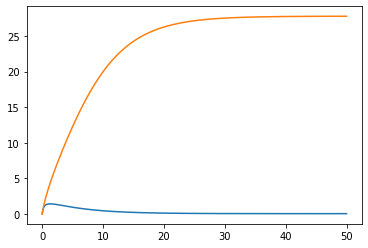

In [37]:
# Number of time points we want for the solutions
n = 800

# Time points we want for the solution
t = np.linspace(0, 50, n)

# Initial condition
iv = yz_0 = np.array([[0.0, 0.0]])

# Parameters
beta_y = 5.0
beta_z = 5.0
n_x = 2
n_y = 2
x_0 = 2.0
Km1 = 1
Km2 = 2
delta = 0.18


# Package parameters into a tuple
args = (beta_y, beta_z, n_x, n_y, Km1, Km2, delta)

for i in range(0, len(iv)):
    
    # Integrate ODES
    yz_og = scipy.integrate.odeint(toggle_switch, iv[i], t, args=args).T

    y_og, z_og = yz_og[0], yz_og[1]
    
    if not i:
        yz_ref = yz_og
    else:
        yz_ref = np.hstack([yz_ref, yz_og])
    plt.plot(t, y_og)
    plt.plot(t, z_og)

In [38]:
yz_ref[0]

array([0.        , 0.30167163, 0.55513548, 0.75010545, 0.89682182,
       1.00809605, 1.09384962, 1.16098796, 1.21424283, 1.25689954,
       1.29128959, 1.31910695, 1.34161044, 1.35975495, 1.37427847,
       1.38576096, 1.39466494, 1.4013643 , 1.40616485, 1.40931945,
       1.41103922, 1.41150193, 1.41085854, 1.40923809, 1.40675168,
       1.40349553, 1.39955341, 1.39499867, 1.38989579, 1.38430176,
       1.37826708, 1.37183674, 1.36505091, 1.35794559, 1.35055314,
       1.34290273, 1.33502071, 1.32693097, 1.31865519, 1.3102131 ,
       1.30162267, 1.29290035, 1.28406115, 1.27511885, 1.26608609,
       1.25697448, 1.24779473, 1.23855666, 1.22926938, 1.21994125,
       1.21058005, 1.20119292, 1.19178652, 1.18236698, 1.17294   ,
       1.16351087, 1.15408449, 1.14466542, 1.13525787, 1.12586577,
       1.11649278, 1.10714228, 1.09781742, 1.08852112, 1.07925611,
       1.07002491, 1.06082987, 1.05167316, 1.04255681, 1.0334827 ,
       1.02445256, 1.015468  , 1.00653052, 0.99764149, 0.98880

In [39]:
 y_ref, z_ref = yz_ref[0], yz_ref[1]

In [40]:
y_ref_scaled = []
z_ref_scaled = []

y_ref, z_ref = yz_ref[0], yz_ref[1]
for i in range(0, len(y_ref)):
    y_ref_scaled.append((y_ref[i] - np.mean(y_ref))/np.std(y_ref))
    z_ref_scaled.append((z_ref[i] - np.mean(z_ref))/np.std(z_ref))
    
y_ref_scaled = np.array(y_ref_scaled) + np.abs(np.min((y_ref_scaled)))
z_ref_scaled = np.array(z_ref_scaled) + np.abs(np.min((z_ref_scaled)))

                                             
#for ii in range()

In [41]:
exp_P = np.array(list(zip(y_ref_scaled, z_ref_scaled))).T

In [42]:
exp_P

array([[0.        , 0.81562569, 1.50091264, ..., 0.09850592, 0.09849272,
        0.09847966],
       [0.        , 0.04614139, 0.08999019, ..., 4.14885775, 4.14887128,
        4.14888467]])

In [48]:
exp_P[0]

array([0.        , 0.81562569, 1.50091264, 2.02805043, 2.4247256 ,
       2.72557632, 2.95742714, 3.13894818, 3.2829327 , 3.39826309,
       3.49124302, 3.56645248, 3.62729486, 3.67635193, 3.71561901,
       3.74666404, 3.77073763, 3.78885059, 3.80182979, 3.81035885,
       3.81500856, 3.8162596 , 3.81452005, 3.81013886, 3.80341639,
       3.79461277, 3.78395453, 3.77163992, 3.75784335, 3.74271883,
       3.72640296, 3.70901733, 3.69067057, 3.67146   , 3.65147313,
       3.6307888 , 3.6094783 , 3.58760618, 3.56523105, 3.54240627,
       3.51918045, 3.49559801, 3.47169958, 3.4475224 , 3.42310065,
       3.39846572, 3.37364653, 3.34866969, 3.32355978, 3.29833945,
       3.27302968, 3.24764983, 3.22221785, 3.19675037, 3.17126277,
       3.14576935, 3.12028338, 3.09481714, 3.06938207, 3.04398879,
       3.01864715, 2.99336632, 2.96815481, 2.94302053, 2.91797084,
       2.89301256, 2.86815204, 2.84339518, 2.81874743, 2.79421386,
       2.76979919, 2.74550776, 2.7213436 , 2.69731045, 2.67341

In [46]:
plot_data

array([[0.        , 0.81562569, 1.50091264, ..., 0.09850592, 0.09849272,
        0.09847966],
       [0.        , 0.04614139, 0.08999019, ..., 4.14885775, 4.14887128,
        4.14888467]])

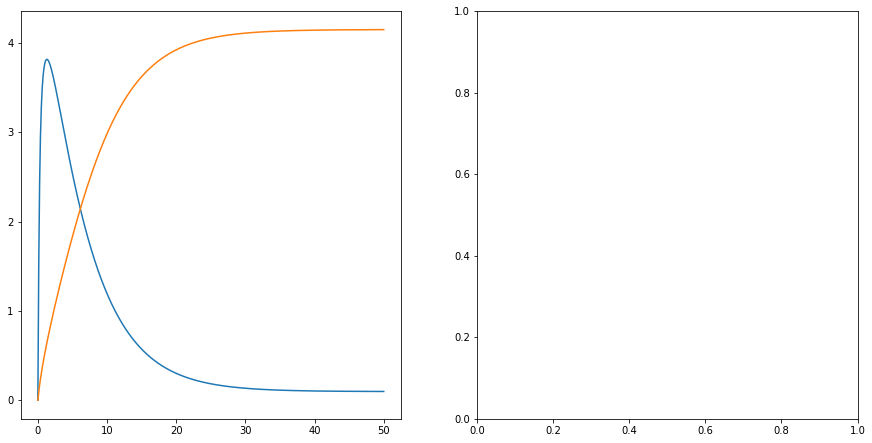

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5))
plot_data = exp_P#.reshape(2, 2, 800)

ax1.plot(t, plot_data[0])
ax1.plot(t, plot_data[1])

#ax2.plot(t, plot_data[1][0])
#ax2.plot(t, plot_data[1][1])

In [63]:
initial_guess = [2, 3, 5, 0.1, 2, 3, 5, 0.1]
fitted_params = least_squares(residuals, initial_guess, bounds=(0, np.inf), method = 'trf', max_nfev=10000, verbose=2, ftol=1e-012, xtol=1e-012).x



   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.8360e+03                                    3.19e+08    
       1              6         6.9769e+03      1.86e+03       8.27e-03       1.52e+08    
       2              7         5.9814e+03      9.95e+02       8.38e-03       8.02e+07    
       3              8         5.4128e+03      5.69e+02       8.63e-03       7.18e+07    
       4             10         5.2535e+03      1.59e+02       2.28e-03       4.86e+06    
       5             12         5.2203e+03      3.32e+01       1.85e-03       2.69e+05    
       6             13         5.2085e+03      1.18e+01       8.06e-04       1.10e+06    
       7             14         5.1959e+03      1.26e+01       8.14e-04       6.19e+05    
       8             15         5.1827e+03      1.31e+01       8.08e-04       8.96e+04    
       9             16         5.1641e+03      1.86e+01       1.43e-03       1.50e+06    

      91             112        3.3496e+03      2.76e+00       2.28e-04       2.15e+04    
      92             113        3.3452e+03      4.40e+00       4.37e-04       2.17e+04    
      93             114        3.3364e+03      8.76e+00       8.74e-04       5.83e+04    
      94             115        3.3192e+03      1.72e+01       1.63e-03       8.72e+04    
      95             116        3.2854e+03      3.38e+01       3.25e-03       5.85e+05    
      96             117        3.2233e+03      6.21e+01       6.53e-03       3.14e+06    
      97             119        3.1865e+03      3.68e+01       3.26e-03       4.72e+05    
      98             120        3.1786e+03      7.86e+00       7.32e-03       9.52e+06    
      99             124        3.1141e+03      6.45e+01       1.92e-05       4.14e+06    
      100            125        3.1059e+03      8.26e+00       1.97e-05       1.55e+06    
      101            126        3.1048e+03      1.10e+00       2.99e-05       9.41e+05    

      185            231        1.6006e+03      1.56e+00       3.07e-03       4.75e+04    
      186            232        1.5990e+03      1.64e+00       5.51e-03       2.51e+04    
      187            233        1.5957e+03      3.25e+00       9.97e-03       2.57e+05    
      188            234        1.5868e+03      8.91e+00       2.43e-02       6.96e+05    
      189            236        1.5809e+03      5.94e+00       1.17e-02       4.80e+03    
      190            239        1.5807e+03      2.20e-01       1.82e-03       2.19e+05    
      191            240        1.5803e+03      3.35e-01       1.70e-03       1.85e+04    
      192            241        1.5801e+03      2.63e-01       1.56e-03       4.62e+04    
      193            242        1.5798e+03      3.00e-01       1.41e-03       3.74e+03    
      194            243        1.5793e+03      4.65e-01       1.30e-03       9.67e+03    
      195            244        1.5787e+03      6.24e-01       2.69e-03       3.03e+04    

      279            337        6.9751e-06      8.79e-06       1.12e+00       1.49e-02    
      280            338        1.3501e-06      5.63e-06       2.23e-01       3.44e-03    
      281            339        2.9382e-07      1.06e-06       3.13e-01       9.08e-04    
      282            340        6.5468e-08      2.28e-07       3.41e-01       4.22e-04    
      283            341        1.0815e-08      5.47e-08       2.50e-01       8.63e-05    
      284            342        1.5751e-09      9.24e-09       1.96e-01       2.77e-05    
      285            343        1.8205e-10      1.39e-09       1.27e-01       5.51e-06    
      286            344        1.7606e-11      1.64e-10       7.95e-02       9.99e-07    
      287            345        1.4717e-12      1.61e-11       4.59e-02       1.59e-07    
      288            346        1.1289e-13      1.36e-12       2.51e-02       2.35e-08    
      289            347        8.5304e-15      1.04e-13       1.32e-02       3.37e-09    

In [172]:
initial_guess = [2, 2, 5, 0.1, 2, 2, 5, 0.1]
fitted_params = least_squares(residuals, initial_guess, bounds=(0, np.inf), method = 'trf', max_nfev=10000, verbose=2, ftol=1e-012, xtol=1e-012).x



   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.2231e+08                                    2.34e+10    
       1              2         1.8931e+08      4.33e+08       2.01e+00       5.91e+09    
       2              3         3.0469e+07      1.59e+08       3.01e-01       8.57e+08    
       3              4         5.1956e+06      2.53e+07       7.63e-01       1.35e+08    
       4              5         9.6697e+05      4.23e+06       8.82e-01       2.27e+07    
       5              6         1.6186e+05      8.05e+05       5.12e-01       3.92e+06    
       6              7         2.7555e+04      1.34e+05       2.41e-01       6.86e+05    
       7              8         8.8389e+03      1.87e+04       1.49e-01       1.23e+05    
       8              9         5.9260e+03      2.91e+03       2.78e-01       1.51e+05    
       9             12         5.7916e+03      1.34e+02       1.09e-01       7.57e+05    

      92             102        1.1393e+03      2.43e+00       1.95e-01       1.07e+03    
      93             103        1.1380e+03      1.29e+00       1.61e-01       1.23e+03    
      94             104        1.1356e+03      2.40e+00       1.96e-01       1.07e+03    
      95             105        1.1344e+03      1.27e+00       1.62e-01       1.22e+03    
      96             106        1.1320e+03      2.36e+00       1.97e-01       1.07e+03    
      97             107        1.1308e+03      1.25e+00       1.63e-01       1.22e+03    
      98             108        1.1284e+03      2.33e+00       1.98e-01       1.07e+03    
      99             109        1.1272e+03      1.22e+00       1.64e-01       1.22e+03    
      100            110        1.1249e+03      2.29e+00       2.00e-01       1.07e+03    
      101            111        1.1237e+03      1.20e+00       1.65e-01       1.22e+03    
      102            112        1.1215e+03      2.26e+00       2.01e-01       1.07e+03    

      183            193        1.0183e+03      6.03e-01       2.07e-01       1.22e+03    
      184            194        1.0171e+03      1.26e+00       2.44e-01       1.14e+03    
      185            195        1.0165e+03      5.92e-01       2.08e-01       1.23e+03    
      186            196        1.0152e+03      1.24e+00       2.45e-01       1.14e+03    
      187            197        1.0146e+03      5.81e-01       2.09e-01       1.23e+03    
      188            198        1.0134e+03      1.23e+00       2.46e-01       1.15e+03    
      189            199        1.0129e+03      5.70e-01       2.09e-01       1.24e+03    
      190            200        1.0116e+03      1.21e+00       2.47e-01       1.15e+03    
      191            201        1.0111e+03      5.60e-01       2.10e-01       1.24e+03    
      192            202        1.0099e+03      1.20e+00       2.48e-01       1.16e+03    
      193            203        1.0093e+03      5.49e-01       2.11e-01       1.25e+03    

      275            285        9.5669e+02      1.17e-01       6.48e-02       6.04e+02    
      276            286        9.5653e+02      1.59e-01       6.98e-02       6.75e+02    
      277            287        9.5641e+02      1.18e-01       6.54e-02       4.51e+02    
      278            288        9.5627e+02      1.44e-01       7.05e-02       5.49e+02    
      279            289        9.5615e+02      1.17e-01       6.57e-02       3.72e+02    
      280            290        9.5601e+02      1.38e-01       7.10e-02       4.74e+02    
      281            291        9.5590e+02      1.17e-01       6.58e-02       3.26e+02    
      282            292        9.5576e+02      1.36e-01       7.12e-02       4.30e+02    
      283            293        9.5554e+02      2.19e-01       1.29e-01       3.48e+02    
      284            294        9.5509e+02      4.55e-01       2.91e-01       8.81e+02    
      285            295        9.5439e+02      6.99e-01       4.49e-01       1.13e+03    

      367            382        9.3257e+02      2.15e-01       1.55e-01       1.70e+03    
      368            383        9.3246e+02      1.06e-01       1.36e-01       1.40e+03    
      369            384        9.3225e+02      2.13e-01       1.55e-01       1.71e+03    
      370            385        9.3214e+02      1.05e-01       1.36e-01       1.41e+03    
      371            386        9.3193e+02      2.12e-01       1.55e-01       1.72e+03    
      372            387        9.3183e+02      1.04e-01       1.37e-01       1.42e+03    
      373            388        9.3162e+02      2.11e-01       1.56e-01       1.73e+03    
      374            389        9.3151e+02      1.03e-01       1.37e-01       1.44e+03    
      375            390        9.3131e+02      2.09e-01       1.56e-01       1.74e+03    
      376            391        9.3120e+02      1.01e-01       1.37e-01       1.45e+03    
      377            392        9.3100e+02      2.08e-01       1.56e-01       1.76e+03    

      459            474        9.2197e+02      5.48e-02       1.52e-02       1.36e+03    
      460            475        9.2194e+02      2.20e-02       1.66e-02       7.68e+02    
      461            476        9.2192e+02      2.73e-02       1.80e-02       9.03e+02    
      462            477        9.2190e+02      1.74e-02       1.87e-02       4.81e+02    
      463            478        9.2188e+02      1.99e-02       1.94e-02       6.08e+02    
      464            479        9.2186e+02      1.59e-02       1.93e-02       3.31e+02    
      465            480        9.2185e+02      1.78e-02       2.00e-02       4.34e+02    
      466            481        9.2183e+02      1.52e-02       1.93e-02       2.46e+02    
      467            482        9.2181e+02      1.70e-02       2.01e-02       3.37e+02    
      468            483        9.2178e+02      2.89e-02       3.84e-02       2.21e+02    
      469            484        9.2172e+02      6.20e-02       8.27e-02       5.12e+02    

      550            567        9.1576e+02      7.46e-05       3.62e-04       9.40e+01    
      551            568        9.1576e+02      1.78e-04       6.57e-05       8.24e+01    
      552            569        9.1576e+02      9.27e-05       6.71e-05       3.92e+01    
      553            570        9.1576e+02      8.46e-05       5.86e-05       2.54e+01    
      554            571        9.1576e+02      5.68e-05       7.12e-05       1.46e+01    
      555            572        9.1576e+02      7.92e-05       4.25e-05       1.09e+01    
      556            573        9.1576e+02      9.81e-05       5.42e-05       3.67e+00    
      557            574        9.1576e+02      9.22e-05       5.21e-05       1.69e+00    
      558            575        9.1576e+02      1.03e-04       5.23e-05       1.62e+00    
      559            576        9.1576e+02      1.99e-04       1.04e-04       1.59e+00    
      560            577        9.1576e+02      4.12e-04       2.06e-04       7.56e+00    

In [23]:
initial_guess = [2, 2, 5, 0.1, 2, 2, 5, 0.1]
fitted_params = least_squares(residuals, initial_guess, bounds=(0, np.inf), method = 'trf', max_nfev=10000, verbose=2, ftol=1e-012, xtol=1e-012).x



   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.2231e+08                                    2.34e+10    
       1              2         1.8931e+08      4.33e+08       2.01e+00       5.91e+09    
       2              3         3.0469e+07      1.59e+08       3.01e-01       8.57e+08    
       3              4         5.1956e+06      2.53e+07       7.63e-01       1.35e+08    
       4              5         9.6697e+05      4.23e+06       8.82e-01       2.27e+07    
       5              6         1.6186e+05      8.05e+05       5.12e-01       3.92e+06    
       6              7         2.7555e+04      1.34e+05       2.41e-01       6.86e+05    
       7              8         8.8389e+03      1.87e+04       1.49e-01       1.23e+05    
       8              9         5.9260e+03      2.91e+03       2.78e-01       1.51e+05    
       9             12         5.7916e+03      1.34e+02       1.09e-01       7.57e+05    

      91             101        1.1418e+03      1.32e+00       1.60e-01       1.23e+03    
      92             102        1.1393e+03      2.43e+00       1.95e-01       1.07e+03    
      93             103        1.1380e+03      1.29e+00       1.61e-01       1.23e+03    
      94             104        1.1356e+03      2.40e+00       1.96e-01       1.07e+03    
      95             105        1.1344e+03      1.27e+00       1.62e-01       1.22e+03    
      96             106        1.1320e+03      2.36e+00       1.97e-01       1.07e+03    
      97             107        1.1308e+03      1.25e+00       1.63e-01       1.22e+03    
      98             108        1.1284e+03      2.33e+00       1.98e-01       1.07e+03    
      99             109        1.1272e+03      1.22e+00       1.64e-01       1.22e+03    
      100            110        1.1249e+03      2.29e+00       2.00e-01       1.07e+03    
      101            111        1.1237e+03      1.20e+00       1.65e-01       1.22e+03    

      182            192        1.0189e+03      1.27e+00       2.43e-01       1.13e+03    
      183            193        1.0183e+03      6.03e-01       2.07e-01       1.22e+03    
      184            194        1.0171e+03      1.26e+00       2.44e-01       1.14e+03    
      185            195        1.0165e+03      5.92e-01       2.08e-01       1.23e+03    
      186            196        1.0152e+03      1.24e+00       2.45e-01       1.14e+03    
      187            197        1.0146e+03      5.81e-01       2.09e-01       1.23e+03    
      188            198        1.0134e+03      1.23e+00       2.46e-01       1.15e+03    
      189            199        1.0129e+03      5.70e-01       2.09e-01       1.24e+03    
      190            200        1.0116e+03      1.21e+00       2.47e-01       1.15e+03    
      191            201        1.0111e+03      5.60e-01       2.10e-01       1.24e+03    
      192            202        1.0099e+03      1.20e+00       2.48e-01       1.16e+03    

      274            284        9.5681e+02      2.07e-01       6.76e-02       8.99e+02    
      275            285        9.5669e+02      1.17e-01       6.48e-02       6.04e+02    
      276            286        9.5653e+02      1.59e-01       6.98e-02       6.75e+02    
      277            287        9.5641e+02      1.18e-01       6.54e-02       4.51e+02    
      278            288        9.5627e+02      1.44e-01       7.05e-02       5.49e+02    
      279            289        9.5615e+02      1.17e-01       6.57e-02       3.72e+02    
      280            290        9.5601e+02      1.38e-01       7.10e-02       4.74e+02    
      281            291        9.5590e+02      1.17e-01       6.58e-02       3.26e+02    
      282            292        9.5576e+02      1.36e-01       7.12e-02       4.30e+02    
      283            293        9.5554e+02      2.19e-01       1.29e-01       3.48e+02    
      284            294        9.5509e+02      4.55e-01       2.91e-01       8.81e+02    

      365            380        9.3289e+02      2.16e-01       1.55e-01       1.69e+03    
      366            381        9.3278e+02      1.07e-01       1.36e-01       1.39e+03    
      367            382        9.3257e+02      2.15e-01       1.55e-01       1.70e+03    
      368            383        9.3246e+02      1.06e-01       1.36e-01       1.40e+03    
      369            384        9.3225e+02      2.13e-01       1.55e-01       1.71e+03    
      370            385        9.3214e+02      1.05e-01       1.36e-01       1.41e+03    
      371            386        9.3193e+02      2.12e-01       1.55e-01       1.72e+03    
      372            387        9.3183e+02      1.04e-01       1.37e-01       1.42e+03    
      373            388        9.3162e+02      2.11e-01       1.56e-01       1.73e+03    
      374            389        9.3151e+02      1.03e-01       1.37e-01       1.44e+03    
      375            390        9.3131e+02      2.09e-01       1.56e-01       1.74e+03    

      456            471        9.2217e+02      5.84e-02       7.03e-02       1.71e+03    
      457            472        9.2206e+02      1.12e-01       8.22e-02       1.77e+03    
      458            473        9.2202e+02      4.12e-02       7.39e-02       1.35e+03    
      459            474        9.2197e+02      5.48e-02       1.52e-02       1.36e+03    
      460            475        9.2194e+02      2.20e-02       1.66e-02       7.68e+02    
      461            476        9.2192e+02      2.73e-02       1.80e-02       9.03e+02    
      462            477        9.2190e+02      1.74e-02       1.87e-02       4.81e+02    
      463            478        9.2188e+02      1.99e-02       1.94e-02       6.08e+02    
      464            479        9.2186e+02      1.59e-02       1.93e-02       3.31e+02    
      465            480        9.2185e+02      1.78e-02       2.00e-02       4.34e+02    
      466            481        9.2183e+02      1.52e-02       1.93e-02       2.46e+02    

      547            562        9.1577e+02      5.03e-03       4.37e-03       4.04e+02    
      548            563        9.1576e+02      3.96e-03       4.55e-03       1.66e+02    
      549            564        9.1576e+02      3.74e-03       4.80e-03       3.84e+02    
      550            567        9.1576e+02      7.46e-05       3.62e-04       9.40e+01    
      551            568        9.1576e+02      1.78e-04       6.57e-05       8.24e+01    
      552            569        9.1576e+02      9.27e-05       6.71e-05       3.92e+01    
      553            570        9.1576e+02      8.46e-05       5.86e-05       2.54e+01    
      554            571        9.1576e+02      5.68e-05       7.12e-05       1.46e+01    
      555            572        9.1576e+02      7.92e-05       4.25e-05       1.09e+01    
      556            573        9.1576e+02      9.81e-05       5.42e-05       3.67e+00    
      557            574        9.1576e+02      9.22e-05       5.21e-05       1.69e+00    

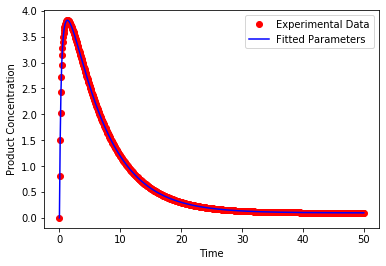

In [56]:
plt.plot(t, plot_data[0], 'ro')
#plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(initial_guess)).T[0], 'g-')
plt.plot(t, odeint(general_toggle_switch, iv[0], t, args = tuple(fitted_params)).T[0], 'b-')
plt.legend(['Experimental Data', 'Fitted Parameters'], loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.show()

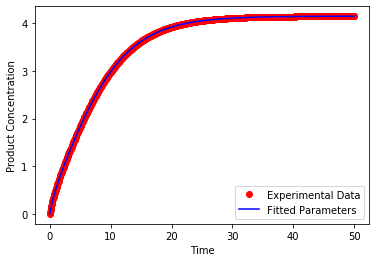

In [58]:
plt.plot(t, plot_data[1], 'ro')
#plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(initial_guess)).T[0], 'g-')
plt.plot(t, odeint(general_toggle_switch, iv[0], t, args = tuple(fitted_params)).T[1], 'b-')
plt.legend(['Experimental Data', 'Fitted Parameters'], loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.show()

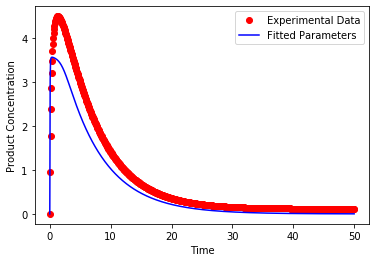

In [173]:
plt.plot(t, plot_data[0][0], 'ro')
#plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(initial_guess)).T[0], 'g-')
plt.plot(t, odeint(general_toggle_switch, iv[0], t, args = tuple(fitted_params)).T[0], 'b-')
plt.legend(['Experimental Data', 'Fitted Parameters'], loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.show()

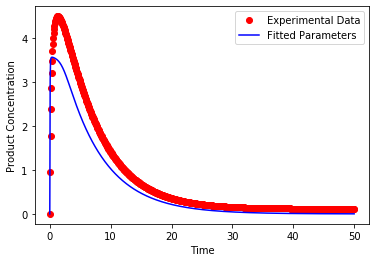

In [24]:
plt.plot(t, plot_data[0][0], 'ro')
#plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(initial_guess)).T[0], 'g-')
plt.plot(t, odeint(general_toggle_switch, iv[0], t, args = tuple(fitted_params)).T[0], 'b-')
plt.legend(['Experimental Data', 'Fitted Parameters'], loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.show()

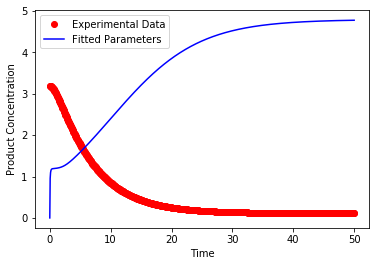

In [174]:
plt.plot(t, plot_data[0][1], 'ro')
#plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(initial_guess)).T[0], 'g-')
plt.plot(t, odeint(general_toggle_switch, iv[0], t, args = tuple(fitted_params)).T[1], 'b-')
plt.legend(['Experimental Data', 'Fitted Parameters'], loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.show()

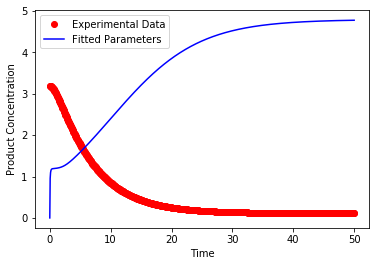

In [25]:
plt.plot(t, plot_data[0][1], 'ro')
#plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(initial_guess)).T[0], 'g-')
plt.plot(t, odeint(general_toggle_switch, iv[0], t, args = tuple(fitted_params)).T[1], 'b-')
plt.legend(['Experimental Data', 'Fitted Parameters'], loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.show()

In [67]:
a1_node1 = 0
a1_node2 = 0

a2_node1 = 0
a2_node2 = 0

b1_node2 = 0
b2_node1 = 0

b1_node1 = fitted_params[0]
b2_node2 = fitted_params[4]

n1 = fitted_params[1]
n2 = fitted_params[5]

beta_node1 = fitted_params[2]
beta_node2 = fitted_params[6]

delta_node1 = fitted_params[3]
delta_node2 = fitted_params[7]


In [176]:
from IPython.display import Latex

Latex('$\\frac{1+'+str(int(a1_node2))+'x_1^{'+str(int(n1))+'}+'+str(int(a2_node2))+'x_2^{'+str(int(n2))+'}}{1+'+str(int(b1_node2))+'x_1^{'+str(int(n1))+'}+'+str(int(b2_node2))+'x_2^{'+str(int(n2))+'}}$')

<IPython.core.display.Latex object>

In [177]:
Latex('$\\frac{1+'+str(int(a1_node1))+'x_1^{'+str(int(n1))+'}+'+str(int(a2_node1))+'x_2^{'+str(int(n2))+'}}{1+'+str(int(b1_node1))+'x_1^{'+str(int(n1))+'}+'+str(int(b2_node1))+'x_2^{'+str(int(n2))+'}}$')

<IPython.core.display.Latex object>

# Node 1

In [178]:
from IPython.display import Latex

Latex('$\dot{x}_1 = \\frac{1+'+str((a1_node1))+'x_1^{'+str((n1))+'}+'+str((a2_node1))+'x_2^{'+str((n2))+'}}{1+'+str((b1_node1))+'x_1^{'+str((n1))+'}+'+str((b2_node1))+'x_2^{'+str((n2))+'}} - ' + str(delta_node1)+'x_1 $')

<IPython.core.display.Latex object>

In [179]:
Latex('$\dot{x}_2 = \\frac{1+'+str((a1_node2))+'x_1^{'+str((n1))+'}+'+str((a2_node2))+'x_2^{'+str((n2))+'}}{1+'+str((b1_node2))+'x_1^{'+str((n1))+'}+'+str((b2_node2))+'x_2^{'+str((n2))+'}} - ' + str(delta_node2)+'x_2 $')

<IPython.core.display.Latex object>

In [44]:
fitted_params

array([1.55276809, 1.99997019, 3.63523082, 0.18000426, 0.01892469,
       1.99944051, 0.8024354 , 0.17998745])

In [35]:
from IPython.display import Latex

Latex('$\dot{x}_1 = \\frac{1+'+str((a1_node1))+'x_1^{'+str((n1))+'}+'+str((a2_node1))+'x_2^{'+str((n2))+'}}{1+'+str((b1_node1))+'x_1^{'+str((n1))+'}+'+str((b2_node1))+'x_2^{'+str((n2))+'}} - ' + str(delta_node1)+'x_1 $')

<IPython.core.display.Latex object>

In [36]:
Latex('$\dot{x}_2 = \\frac{1+'+str((a1_node2))+'x_1^{'+str((n1))+'}+'+str((a2_node2))+'x_2^{'+str((n2))+'}}{1+'+str((b1_node2))+'x_1^{'+str((n1))+'}+'+str((b2_node2))+'x_2^{'+str((n2))+'}} - ' + str(delta_node2)+'x_2 $')

<IPython.core.display.Latex object>

In [59]:
from IPython.display import Latex

Latex('$\dot{x}_1 = '+str((beta_node1))+'\\frac{1+'+str((a1_node1))+'x_1^{'+str((n1))+'}+'+str((a2_node1))+'x_2^{'+str((n2))+'}}{1+'+str((b1_node1))+'x_1^{'+str((n1))+'}+'+str((b2_node1))+'x_2^{'+str((n2))+'}} - ' + str(delta_node1)+'x_1 $')

<IPython.core.display.Latex object>

In [60]:
Latex('$\dot{x}_2 = '+str((beta_node2))+'\\frac{1+'+str((a1_node2))+'x_1^{'+str((n1))+'}+'+str((a2_node2))+'x_2^{'+str((n2))+'}}{1+'+str((b1_node2))+'x_1^{'+str((n1))+'}+'+str((b2_node2))+'x_2^{'+str((n2))+'}} - ' + str(delta_node2)+'x_2 $')

<IPython.core.display.Latex object>

In [ ]:
[2, 2, 5, 0.1, 2, 2, 5, 0.1]

In [ ]:
# Parameters
beta_y = 5.0
beta_z = 5.0
n_x = 2
n_y = 2
x_0 = 2.0
Km1 = 1
Km2 = 2
delta = 0.18

In [61]:
np.sqrt(44.7)

6.685805860178712

In [62]:
np.sqrt(0.034)

0.18439088914585774

In [68]:
from IPython.display import Latex

Latex('$\dot{x}_1 = '+str((beta_node1))+'\\frac{1+'+str((a1_node1))+'x_1^{'+str((n1))+'}+'+str((a2_node1))+'x_2^{'+str((n2))+'}}{1+'+str((b1_node1))+'x_1^{'+str((n1))+'}+'+str((b2_node1))+'x_2^{'+str((n2))+'}} - ' + str(delta_node1)+'x_1 $')

<IPython.core.display.Latex object>

In [69]:
Latex('$\dot{x}_2 = '+str((beta_node2))+'\\frac{1+'+str((a1_node2))+'x_1^{'+str((n1))+'}+'+str((a2_node2))+'x_2^{'+str((n2))+'}}{1+'+str((b1_node2))+'x_1^{'+str((n1))+'}+'+str((b2_node2))+'x_2^{'+str((n2))+'}} - ' + str(delta_node2)+'x_2 $')

<IPython.core.display.Latex object>